__Процедурне__
https://cms.ucu.edu.ua/mod/vpl/view.php?id=306619

_Початковий код:_

In [ ]:
import string
import random

alphabet = list(string.ascii_uppercase)
vowels=['A', 'E', 'I', 'O', 'U', 'Y']
EN=r"D:\УКУ\ОП\1semester\Lab6\en.txt"

def three_letters()->list[str]:
    """
    Generates list of letters.
    """
    letter_list=random.choices(alphabet, k = 3)
    return letter_list
def generate_grid()->list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    my_grid=[]
    counter=0
    vowels_counter=0
    while counter<3:
        my_grid.append(three_letters())
        counter+=1
    for element in my_grid:
        for letter in element:
            if letter in vowels:
                vowels_counter+=1
    if vowels_counter!=3:
        return generate_grid()
    return my_grid
def listok_of_letters(listochok:list[list[str]])->list[str]:
    """"
    Make one list of letters from the list of lists of letters.
    """
    letters_list=[]
    for element in listochok:
        for letter in element:
            letters_list.append(letter.lower())
    return letters_list
def get_user_words()->list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    user_words_listok=[]
    while True:
        try:
            user_words=input()
            user_words_listok.append(user_words)
        except EOFError:
            return user_words_listok
def get_words(text:str, letters:list[str])->list[str]:
    """
    Checks the words with rules and returns a list of words.
    >>> get_words('en.txt', ['e', 't', 'o', 'o', 'p', 'n', 'p', 'u', 'r']) 
    ['epopt', 'erupt', 'netop', 'noop', 'nope', 'noup', 'nupe', 'open', 'opportune',
 'outpop', 'pent', 'peon', 'pepo', 'pern', 'pert', 'peru', 'perun', 'peto', 'poet', 'pone',
 'pont', 'ponto', 'poon', 'poop', 'poor', 'poot', 'pope', 'pore', 'port', 'porteno', 'porto',
 'pote', 'poter', 'pour', 'pout', 'pouter', 'prep', 'prone', 'pronto', 'proo', 'prop', 'propone',
 'prote', 'proto', 'proton', 'protone', 'prue', 'prune', 'prunt', 'prut', 'puno', 'punt',
 'punter', 'punto', 'pure', 'repot', 'repp', 'rope', 'ropp', 'roup', 'roupet', 'tepor',
 'terp', 'toop', 'tope', 'topepo', 'toper', 'topo', 'topper', 'toprope', 'toup', 'troop',
 'trope', 'troupe', 'turp', 'unpope', 'unpot', 'unprop', 'unrope', 'untop', 'upon', 'uppent', 
'upper', 'uproot', 'uptorn']
    """
    with open(text, 'r', encoding='UTF-8') as file:
        data=file.readlines()
        all_data=[line.strip('\n') for line in data[3:]]
        list_of_words=[]
        letters_copy_cop=[]
        central_letter=letters[4]
        for line1 in all_data:
            length_line1=len(line1)
            counter_of_centre=0
            line1=line1.lower()
            if length_line1<4:
                continue
            for i in range(length_line1):
                letter=line1[i]
                if letter==central_letter:
                    counter_of_centre+=1
                if i==length_line1-1:
                    if letter not in letters:
                        break
                    letters_copy_cop.append(letter)
                    letters.remove(letter)
                    if counter_of_centre>0:
                        if line1 not in list_of_words:
                            list_of_words.append(line1)
                    break
                if letter not in letters:
                    break
                letters_copy_cop.append(letter)
                letters.remove(letter)
            if not letters_copy_cop:
                continue
            for element in letters_copy_cop:
                letters.append(element)
            letters_copy_cop=[]
        return list_of_words
def get_pure_user_words(user_words:list[str], letters:list, words_from_dict: list[str])->list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    >>> get_pure_user_words(['upper', 'pet', 'uproot', 'open', 'opto'],\
['e', 't', 'o', 'o', 'p', 'n', 'p', 'u', 'r'],\
['epopt', 'erupt', 'netop', 'noop', 'nope', 'noup', 'nupe', 'open', 'opportune',\
'outpop', 'pent', 'peon', 'pepo', 'pern', 'pert', 'peru', 'perun', 'peto', 'poet', 'pone',\
'pont', 'ponto', 'poon', 'poop', 'poor', 'poot', 'pope', 'pore', 'port', 'porteno', 'porto',\
'pote', 'poter', 'pour', 'pout', 'pouter', 'prep', 'prone', 'pronto', 'proo', 'prop', 'propone',\
'prote', 'proto', 'proton', 'protone', 'prue', 'prune', 'prunt', 'prut', 'puno', 'punt',\
'punter', 'punto', 'pure', 'repot', 'repp', 'rope', 'ropp', 'roup', 'roupet', 'tepor',\
'terp', 'toop', 'tope', 'topepo', 'toper', 'topo', 'topper', 'toprope', 'toup', 'troop',\
'trope', 'troupe', 'turp', 'unpope', 'unpot', 'unprop', 'unrope', 'untop', 'upon', 'uppent',\
'upper', 'uproot', 'uptorn'])
    ['opto']
    """
    final_list=[]
    list_of_words=[]
    letters_copy_cop=[]
    central_letter=letters[4]
    for line1 in user_words:
        length_line1=len(line1)
        counter_of_centre=0
        line1=line1.lower()
        if length_line1<4:
            continue
        for i in range(length_line1):
            letter=line1[i]
            if letter==central_letter:
                counter_of_centre+=1
            if i==length_line1-1:
                if letter not in letters:
                    break
                letters_copy_cop.append(letter)
                letters.remove(letter)
                if counter_of_centre>0:
                    list_of_words.append(line1)
                break
            if letter not in letters:
                break
            letters_copy_cop.append(letter)
            letters.remove(letter)
        if not letters_copy_cop:
            continue
        for element in letters_copy_cop:
            letters.append(element)
        letters_copy_cop=[]
    for word in list_of_words:
        if word not in words_from_dict:
            final_list.append(word)
    return final_list
def number_right_words(user_words:list[str], words_from_dict: list[str])->int:
    """
    Checks user words with the rules and returns number of right words.
    """
    right_words=0
    for user_word in user_words:
        for dict_word in words_from_dict:
            if user_word==dict_word:
                right_words+=1
    return right_words
def missed(user_words:list[str], words_from_dict: list[str])->list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in the user's list.
    """
    missed_words=words_from_dict.copy()
    for user_word in user_words:
        for dict_word in missed_words:
            if user_word==dict_word:
                missed_words.remove(dict_word)
    return missed_words

def main():
    """
    Doing different functions to create a game.
    """
    user_grid=generate_grid()
    print(f'Your board is {user_grid}\nPlease suggest your words here:')
    user_words_list=get_user_words()
    letters_list=listok_of_letters(user_grid)
    words_from_dict=get_words(EN, letters_list)
    print('Number of the right words',number_right_words(user_words_list, words_from_dict))
    print('All possible words:\n',words_from_dict)
    print('You missed the following words:\n',missed(user_words_list, words_from_dict))
    print("You suggest, but we don't have them in the dictionary:",\
get_pure_user_words(user_words_list,letters_list, words_from_dict))

if __name__ == '__main__':
    main()

Цей код проходить всі необхідні тести, проте є не оптимізованим.

Для обрахунку пам'яті використовувала такий код:

In [ ]:
import psutil
def memory_usage():
    process = psutil.Process()
    mem = process.memory_info().rss / (1024 * 1024)
    return mem
print(memory_usage())

Пам'ять використовувалася в межах 15Mb

Для обрахунку часу такий код:

In [ ]:
import time
start_time = time.time()
end_time = time.time()
execution_time = end_time - start_time
print(execution_time)

Час:

Спробуймо оптимізувати його за допомогою ШІ за допомогою загальної умови "Оптимізуй наступний код"

In [ ]:
import string
import random

alphabet = list(string.ascii_uppercase)
vowels = ['A', 'E', 'I', 'O', 'U', 'Y']
EN = r"D:\УКУ\ОП\1semester\Lab6\en.txt"

def generate_three_letters() -> list[str]:
    """Generate a list of three random letters."""
    return random.choices(alphabet, k=3)

def generate_grid() -> list[list[str]]:
    """Generate a grid for the game."""
    my_grid = [generate_three_letters() for _ in range(3)]
    vowels_counter = sum(letter in vowels for row in my_grid for letter in row)
    if vowels_counter != 3:
        return generate_grid()  # Avoids recursion, uses a loop instead
    return my_grid

def flatten_grid(grid: list[list[str]]) -> list[str]:
    """Flatten the grid into a single list of letters."""
    return [letter.lower() for row in grid for letter in row]

def get_user_words() -> list[str]:
    """Get words from user input."""
    print("Enter words (press Ctrl+D on Unix or Ctrl+Z on Windows to finish):")
    return [word.strip() for word in iter(input, '')]

def load_dictionary(file: str) -> set[str]:
    """Load a set of words from a file."""
    with open(file, 'r', encoding='utf-8') as f:
        return {line.strip().lower() for line in f.readlines()[3:]}

def filter_user_words(user_words: list[str], valid_words: set[str]) -> list[str]:
    """Filter user words against the valid words."""
    return [word for word in user_words if word.lower() not in valid_words]

def main():
    """Run the game."""
    user_grid = generate_grid()
    print(f"Your board is {user_grid}")
    user_words = get_user_words()
    letters_list = flatten_grid(user_grid)
    dictionary = load_dictionary(EN)
    valid_words = [word for word in dictionary if set(word).issubset(set(letters_list))]
    print('Number of correct words:', len(set(user_words) & valid_words))
    print('All possible words:\n', valid_words)
    print('Words missed by the user:\n', filter_user_words(user_words, valid_words))
    print("User suggested, but not in dictionary:", filter_user_words(user_words, dictionary))

if __name__ == '__main__':
    main()


Код став виглядати меншим і дійсно акуратніший та компактніший, проте через зміну назв функцій, тести не проходять. Навіть, якщо використовувати його вручну, видає помилку.

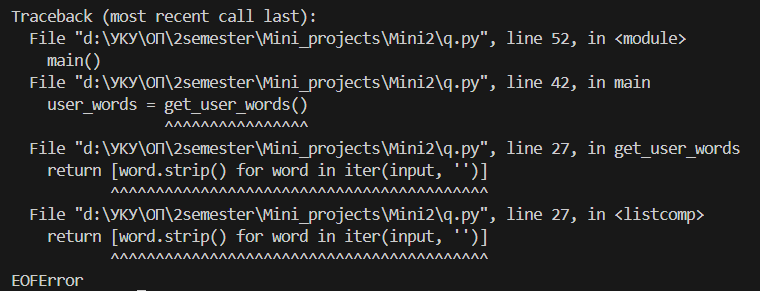

Спробуймо змінити прохання на "Оптимізуй без зміни назв функцій".

In [ ]:
import string
import random

alphabet = list(string.ascii_uppercase)
vowels = ['A', 'E', 'I', 'O', 'U', 'Y']
EN = r"D:\УКУ\ОП\1semester\Lab6\en.txt"

def three_letters() -> list[str]:
    """
    Generates list of letters.
    """
    return random.choices(alphabet, k=3)

def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    while True:
        my_grid = [three_letters() for _ in range(3)]
        if sum(letter in vowels for row in my_grid for letter in row) == 3:
            return my_grid

def listok_of_letters(listochok: list[list[str]]) -> list[str]:
    """"
    Make one list of letters from the list of lists of letters.
    """
    return [letter.lower() for sublist in listochok for letter in sublist]

def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    user_words_listok = []
    while True:
        try:
            user_words_listok.append(input())
        except EOFError:
            return user_words_listok

def get_words(text: str, letters: list[str]) -> list[str]:
    """
    Checks the words with rules and returns a list of words.
    """
    with open(text, 'r', encoding='UTF-8') as file:
        data = [line.strip('\n') for line in file.readlines()[3:]]
        words = []
        central_letter = letters[4]
        for word in data:
            if len(word) < 4:
                continue
            word = word.lower()
            counter_of_centre = word.count(central_letter)
            if all(letter in letters for letter in word):
                if counter_of_centre > 0 and word not in words:
                    words.append(word)
                for letter in word:
                    if letter in letters:
                        letters.remove(letter)
        return words

def get_pure_user_words(user_words: list[str], letters: list, words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    """
    final_list = []
    central_letter = letters[4]
    for word in user_words:
        if len(word) < 4:
            continue
        word = word.lower()
        if all(letter in letters for letter in word):
            if word not in words_from_dict and word.count(central_letter) > 0:
                final_list.append(word)
                for letter in word:
                    if letter in letters:
                        letters.remove(letter)
    return final_list

def number_right_words(user_words: list[str], words_from_dict: list[str]) -> int:
    """
    Checks user words with the rules and returns number of right words.
    """
    return sum(user_word in words_from_dict for user_word in user_words)

def missed(user_words: list[str], words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in the user's list.
    """
    return [word for word in words_from_dict if word not in user_words]

def main():
    """
    Doing different functions to create a game.
    """
    user_grid = generate_grid()
    print(f'Your board is {user_grid}\nPlease suggest your words here:')
    user_words_list = get_user_words()
    letters_list = listok_of_letters(user_grid)
    words_from_dict = get_words(EN, letters_list)
    print('Number of the right words', number_right_words(user_words_list, words_from_dict))
    print('All possible words:\n', words_from_dict)
    print('You missed the following words:\n', missed(user_words_list, words_from_dict))
    print("You suggest, but we don't have them in the dictionary:",
          get_pure_user_words(user_words_list, letters_list, words_from_dict))

if __name__ == '__main__':
    main()


Все одно не всі тести проходять, але вже краще - 0,22/1. Якщо ж перевіряти вручну, то видає таку помилку:

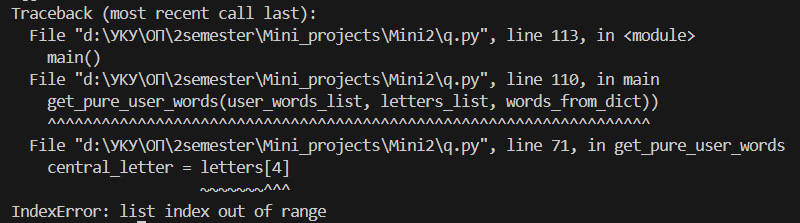

Спробуймо оптимізувати окремо кожну функцію.

In [16]:
import string
import numpy as np

alphabet = np.array(list(string.ascii_uppercase))
vowels = {'A', 'E', 'I', 'O', 'U', 'Y'}

def three_letters() -> list[str]:
    """
    Generates list of letters.
    """
    letter_list = np.random.choice(alphabet, size=3)
    return letter_list.tolist()
def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    my_grid = [three_letters() for _ in range(3)]

    vowels_counter = sum(letter in vowels for row in my_grid for letter in row)

    if vowels_counter != 3:
        return generate_grid()
    return my_grid
def list_of_letters(grid: list[list[str]]) -> list[str]:
    """"
    Make one list of letters from the list of lists of letters.
    """
    return [letter.lower() for row in grid for letter in row]
def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    user_words_list = []
    try:
        while True:
            user_word = input("Enter a word: ")
            user_words_list.append(user_word)
    except EOFError:
        return user_words_list
def get_words(text: str, letters: list[str]) -> list[str]:
    """
    Checks the words with rules and returns a list of words.
    """
    with open(text, 'r', encoding='UTF-8') as file:
        data = [line.strip().lower() for line in file.readlines()[3:]]
    
    central_letter = letters[4]
    list_of_words = []

    for word in data:
        if len(word) < 4:
            continue

        if central_letter not in word:
            continue

        letters_copy = letters.copy()
        for letter in word:
            if letter not in letters_copy:
                break
            letters_copy.remove(letter)
        else:
            list_of_words.append(word)

    return list_of_words
def get_pure_user_words(user_words: list[str], letters: list, words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    """
    final_list = []
    list_of_words = []
    central_letter = letters[4]

    for word in user_words:
        if len(word) < 4:
            continue

        letters_copy = letters.copy()
        counter_of_centre = 0
        word_lower = word.lower()

        for letter in word_lower:
            if letter == central_letter:
                counter_of_centre += 1
            if letter not in letters_copy:
                break
            letters_copy.remove(letter)
        else:
            if counter_of_centre > 0:
                list_of_words.append(word_lower)

    for word in list_of_words:
        if word not in words_from_dict:
            final_list.append(word)

    return final_list
def number_right_words(user_words: list[str], words_from_dict: set[str]) -> int:
    """
    Checks user words with the rules and returns number of right words.
    """
    right_words = sum(user_word in words_from_dict for user_word in user_words)
    return right_words
def missed(user_words: list[str], words_from_dict: set[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in the user's list.
    """
    missed_words = list(words_from_dict - set(user_words))
    return missed_words
def main():
    """
    Doing different functions to create a game.
    """
    user_grid = generate_grid()
    print(f'Your board is {user_grid}\nPlease suggest your words here:')
    user_words_list = get_user_words()
    letters_list = list_of_letters(user_grid)
    words_from_dict = set(get_words(EN, letters_list))
    right_words_count = number_right_words(user_words_list, words_from_dict)
    missed_words = missed(user_words_list, words_from_dict)
    pure_user_words = get_pure_user_words(user_words_list, letters_list, words_from_dict)

if __name__ == '__main__':
    main()

Your board is [['I', 'T', 'O'], ['W', 'G', 'F'], ['Q', 'C', 'E']]
Please suggest your words here:


У цьому випадку тести на смс видали посилку пов'язану з пам'яттю.

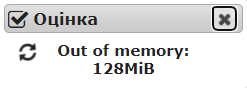

Тоді я попросила ШІ замінити бібліотеку numpy. В результаті код мав наступний вигляд:

In [ ]:
import string
import random

alphabet = list(string.ascii_uppercase)
vowels = {'A', 'E', 'I', 'O', 'U', 'Y'}

EN = r"D:\УКУ\ОП\1semester\Lab6\en.txt"

def three_letters() -> list[str]:
    """
    Generates list of letters.
    """
    return random.choices(alphabet, k=3)

def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    """
    return [three_letters() for _ in range(3)]
def list_of_letters(grid: list[list[str]]) -> list[str]:
    """"
    Make one list of letters from the list of lists of letters.
    """
    return [letter.lower() for row in grid for letter in row]
def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    user_words_list = []
    try:
        while True:
            user_word = input("Enter a word: ")
            user_words_list.append(user_word)
    except EOFError:
        return user_words_list
def get_words(text: str, letters: list[str]) -> list[str]:
    """
    Checks the words with rules and returns a list of words.
    """
    with open(text, 'r', encoding='UTF-8') as file:
        data = [line.strip().lower() for line in file.readlines()[3:]]
    
    central_letter = letters[4]
    list_of_words = []

    for word in data:
        if len(word) < 4:
            continue

        if central_letter not in word:
            continue

        letters_copy = letters.copy()
        for letter in word:
            if letter not in letters_copy:
                break
            letters_copy.remove(letter)
        else:
            list_of_words.append(word)

    return list_of_words
def get_pure_user_words(user_words: list[str], letters: list, words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    """
    final_list = []
    list_of_words = []
    central_letter = letters[4]

    for word in user_words:
        if len(word) < 4:
            continue

        letters_copy = letters.copy()
        counter_of_centre = 0
        word_lower = word.lower()

        for letter in word_lower:
            if letter == central_letter:
                counter_of_centre += 1
            if letter not in letters_copy:
                break
            letters_copy.remove(letter)
        else:
            if counter_of_centre > 0:
                list_of_words.append(word_lower)

    for word in list_of_words:
        if word not in words_from_dict:
            final_list.append(word)

    return final_list
def number_right_words(user_words: list[str], words_from_dict: set[str]) -> int:
    """
    Checks user words with the rules and returns number of right words.
    """
    right_words = sum(user_word in words_from_dict for user_word in user_words)
    return right_words
def missed(user_words: list[str], words_from_dict: set[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in the user's list.
    """
    missed_words = list(words_from_dict - set(user_words))
    return missed_words
def main():
    """
    Doing different functions to create a game.
    """
    user_grid = generate_grid()
    print(f'Your board is {user_grid}\nPlease suggest your words here:')
    user_words_list = get_user_words()
    letters_list = list_of_letters(user_grid)
    words_from_dict = set(get_words(EN, letters_list))
    right_words_count = number_right_words(user_words_list, words_from_dict)
    missed_words = missed(user_words_list, words_from_dict)
    pure_user_words = get_pure_user_words(user_words_list, letters_list, words_from_dict)

if __name__ == '__main__':
    main()

Тести на смс пройшли, але, якщо порівнювати із ручним вводом, то в результаті у функції main() трохи змінилися виводи:

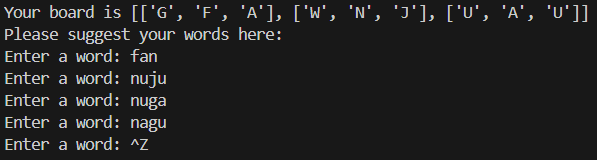

Якщо ж порівнювати з пам'яттю, то її використання збільшилося:

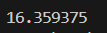

Час:

Також постала проблема з pep8, тому можна попросити ШІ спробувати виправити це.

Спочатку я мала такі проблеми:

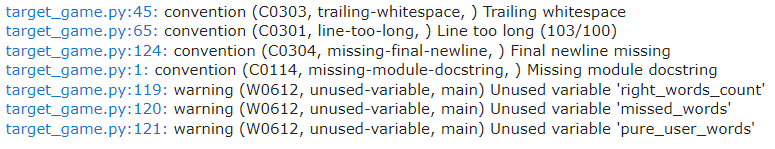

Після оновленого коду:

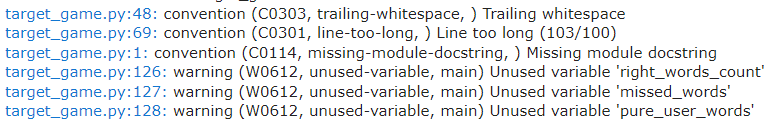

Як можна побачити ШІ виправив лише 1 проблему.

Коли ж я скинула йому ці проблеми і попросила виправити, він виправив ще 1 проблему, проте до кінця в нього виправити це не вийшло.

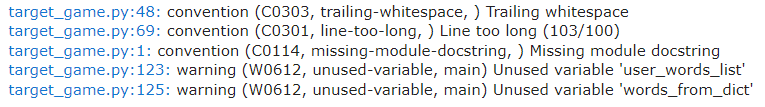

__ООП:__

_Початковий код:_

In [ ]:
import string
import random

class Word:
    """
    Word class.
    """
    def __init__(self, word:str) -> None:
        self.word=word.lower().strip()

    def is_valid(self, board:list)->bool:
        """
        Check if word is valid.
        """
        list_of_words=[]
        letters_copy_cop=[]
        letters_list=[]
        if isinstance(board, list):
            boardy=board
        else:
            boardy=board.grid
        for element in boardy:
            for letter in element:
                letters_list.append(letter.lower())
        central_letter=letters_list[4]
        length_word=len(self.word)
        counter_of_centre=0
        if length_word<4:
            return False
        for i in range(length_word):
            letter=self.word[i]
            if letter==central_letter:
                counter_of_centre+=1
            if i==length_word-1:
                if letter not in letters_list:
                    return False
                letters_copy_cop.append(letter)
                letters_list.remove(letter)
                if counter_of_centre>0:
                    if self.word not in list_of_words:
                        return True
                return False
            if letter not in letters_list:
                return False
            letters_copy_cop.append(letter)
            letters_list.remove(letter)
        return None

    def __eq__(self, __value: object) -> bool:
        return self.word == __value

    def __repr__(self) -> str:
        return self.word

class Board:
    """
    Board class.
    """
    alphabet=list(string.ascii_uppercase)
    vowels=['A', 'E', 'I', 'O', 'U']

    def __init__(self, grid=None) -> None:
        if grid is None:
            self.grid=self.generate_grid()
        else:
            self.grid=grid

    @classmethod
    def generate_grid(cls)->list[list[str]]:
        """
        Generates list of lists of letters - i.e. grid for the game.
        e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
        """
        my_grid=[]
        counter=0
        vowels_counter=0
        while counter<3:
            letter_list=random.choices(cls.alphabet, k = 3)
            my_grid.append(letter_list)
            counter+=1
        for element in my_grid:
            for letter in element:
                if letter in cls.vowels:
                    vowels_counter+=1
        if vowels_counter!=3:
            return cls.generate_grid()
        return my_grid

    def get_words(self, filename:str)->list[Word]:
        """
        Checks the words with rules and returns a list of words.
        """
        with open(filename, 'r', encoding='UTF-8') as file:
            data=file.readlines()
            all_data=[line.strip('\n') for line in data[3:]]
            final_list=[]
            word_board=self.grid
            for line in all_data:
                new_word=Word(line)
                if new_word.is_valid(word_board):
                    final_list.append(new_word)
            return final_list

    def __str__(self) -> str:
        space='\n'
        my_board=self.grid
        strin=''
        for letts in my_board:
            for lett in letts:
                strin+=lett
            strin+='\n'
        strin=strin.strip()
        return f'Your board is:{space}{strin}'

class TargetGame:
    """
    Game class.
    """
    def __init__(self, filename:str, board=None, user_words=None) -> None:
        self.filename=filename
        self.board=Board(board)
        self.__possible_words=self.board.get_words(filename)
        self.user_words=user_words

    @property
    def user_words(self)->list:
        """
        Doc.
        """
        return self.__user_words

    @user_words.setter
    def user_words(self, listok:list)->None:
        another_listok=self.get_user_words(listok)
        self.__user_words=another_listok

    def get_user_words(self, listok:list)->list:
        """
        Doc.
        """
        if listok is not None:
            new_listok=[]
            for word in listok:
                new_word=word.lower()
                new_listok.append(Word(new_word))
            return new_listok
        user_words_listok=[]
        print(self.board)
        print('Please, suggest your words.\nWhen you finished, hit: *nix: Ctrl-D, \
Windows: Ctrl-Z+Return')
        while True:
            try:
                my_user_words=input()
                user_words_listok.append(Word(my_user_words))
            except EOFError:
                return user_words_listok

    @property
    def correct_user_words(self)->list:
        """
        Doc.
        """
        return [my_word for my_word in self.__user_words for sec_word in self.__possible_words if
                    my_word == sec_word]

    def __str__(self) -> str:
        space='\n'
        number=int(len(self.correct_user_words)*100/len(self.__possible_words))
        return f"---------Game results---------:{space}\
The list of your words is:{space}\
{self.user_words}{space}\
The list of your correct words:{space}\
{self.correct_user_words}{space}\
The number of possible words: {len(self.__possible_words)}{space}\
You guess {number}% of \
possible words."

Пам'ять:

Час:

Я попросила ШІ оптимізувати код:

In [ ]:
import string
import random

class Word:
    """
    Word class.
    """
    def __init__(self, word: str) -> None:
        self.word = word.lower().strip()

    def is_valid(self, board: list) -> bool:
        """
        Check if word is valid.
        """
        letters_set = set(letter.lower() for row in board for letter in row)
        central_letter = board[1][1].lower()
        
        if len(self.word) < 4 or central_letter not in self.word or self.word.count(central_letter) > 1:
            return False
        
        for letter in self.word:
            if letter not in letters_set:
                return False
            letters_set.remove(letter)
        return True

    def __eq__(self, other: object) -> bool:
        return self.word == other

    def __repr__(self) -> str:
        return self.word

class Board:
    """
    Board class.
    """
    alphabet = list(string.ascii_uppercase)
    vowels = {'A', 'E', 'I', 'O', 'U'}

    def __init__(self, grid=None) -> None:
        self.grid = grid if grid is not None else self.generate_grid()

    @classmethod
    def generate_grid(cls) -> list:
        """
        Generates list of lists of letters - i.e. grid for the game.
        """
        while True:
            grid = [random.choices(cls.alphabet, k=3) for _ in range(3)]
            if sum(letter in cls.vowels for row in grid for letter in row) == 3:
                return grid

    def get_words(self, filename: str) -> list:
        """
        Checks the words with rules and returns a list of words.
        """
        with open(filename, 'r', encoding='UTF-8') as file:
            words = [Word(line.strip()) for line in file.readlines()[3:]]
        return [word for word in words if word.is_valid(self.grid)]

    def __str__(self) -> str:
        return '\n'.join(''.join(row) for row in self.grid)

class TargetGame:
    """
    Game class.
    """
    def __init__(self, filename: str, board=None, user_words=None) -> None:
        self.filename = filename
        self.board = Board(board)
        self.possible_words = self.board.get_words(filename)
        self.user_words = user_words if user_words is not None else self.get_user_words()

    @staticmethod
    def get_user_words() -> list:
        """
        Prompt user for words.
        """
        print("Please suggest your words. When you're finished, press Ctrl-D (Unix) or Ctrl-Z+Return (Windows).")
        user_words = []
        while True:
            try:
                word = input().strip().lower()
                user_words.append(Word(word))
            except EOFError:
                break
        return user_words

    @property
    def correct_user_words(self) -> list:
        """
        Get list of correct user words.
        """
        return [word for word in self.user_words if word in self.possible_words]

    def __str__(self) -> str:
        percentage = len(self.correct_user_words) * 100 / len(self.possible_words)
        return f"--------- Game results ---------\n" \
               f"The list of your words is:\n{self.user_words}\n" \
               f"The list of your correct words:\n{self.correct_user_words}\n" \
               f"The number of possible words: {len(self.possible_words)}\n" \
               f"You guessed {percentage:.2f}% of possible words."

Після оптимізації ШІ код продить на 0,52/1.

Пам'ять:

Час:

__Висновки:__

Обсяг:
1. Чим більший обсяг, тим гірший результат. Код не просто не оптимізовується, але й ламається, починає видавати різного роду помилки.
2. Але навіть, якщо розбити код на функції і попросити оптимізувати кожну з них: незважаючи на те, що код буде працювати, проте пам'ять, яку він використовує не зменшиться, а може навіть збільшитися. Так само з часом. 
3. Крім того, страждає й коректність коду щодо pep8. Якщо декілька разів попросити ШІ виправити це, то він зможе виправити, але лише декілька.
4. Проте, якщо говорити про саму конструкцію, то код став читабельнішим, приємнішим.

Промпт:
1. Просте "Оптимізуй" може тільки зламати код, якщо він дуже великий. З меншими кодами це може частковоспрацювати, але від оптимізації там буде лише вигляд.
2. Якщо ж потрібно виправити стиль, то це обов'язково потрібно вказуати, бо ШІ не хоче зразу це прописувати. Проте навіть, якщо попросити його це виправити, він все одно не зможе виправити.

Оформлення коду:
1. Частково може, щоб записати код в меншу кількість рядків.
2. Якщо говорити про pep8, то він з цим справляється не дуже добре.